In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

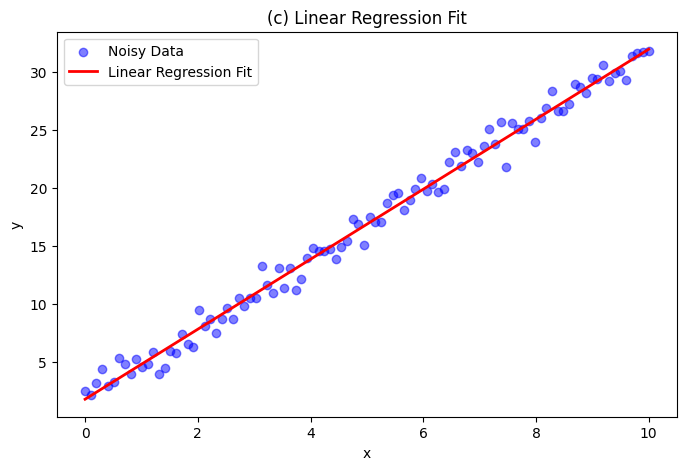

(d) Polynomial Regression (Degree 2) and MSE: 0.6196


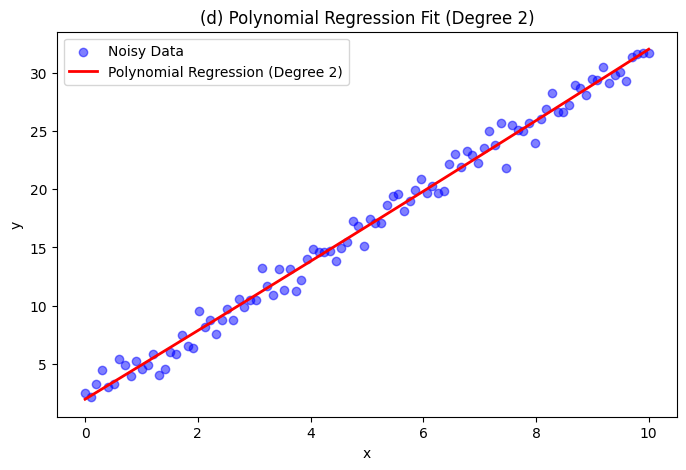

(d) Polynomial Regression (Degree 3) and MSE: 0.6022


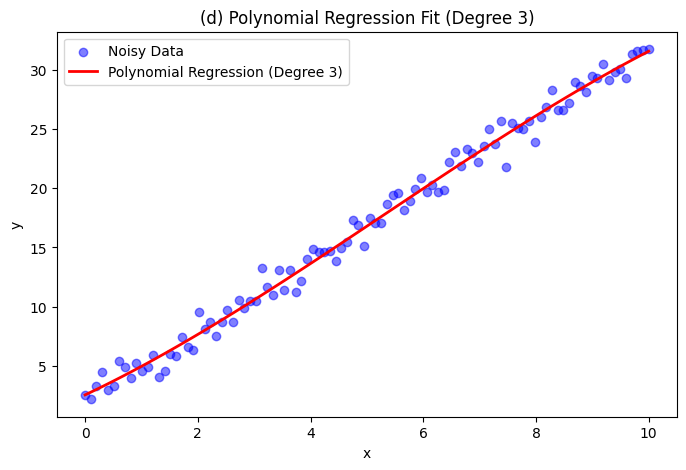

In [6]:
## Question 8

np.random.seed(42)

x = np.linspace(0, 10, 100).reshape(-1, 1)
w0, w1 = 2, 3
y_true = w0 + w1 * x
noise = np.random.normal(0, 1, size=x.shape)
y = y_true + noise

## a)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## b)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

## c)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(x, linear_model.predict(x), label="Linear Regression Fit", color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("(c) Linear Regression Fit")
plt.legend()
plt.show()

## d)
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_test)
    X_poly = poly.transform(x)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    y_pred_poly = poly_reg.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    print(f"(d) Polynomial Regression (Degree {degree}) and MSE: {mse_poly:.4f}")

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.5)
    plt.plot(x, poly_reg.predict(X_poly), label=f"Polynomial Regression (Degree {degree})", color="red", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"(d) Polynomial Regression Fit (Degree {degree})")
    plt.legend()
    plt.show()


Final weights for learning rate 0.01: [-0.04687704  0.02108314 -0.01723465]
Final weights for learning rate 0.05: [-0.21358772  0.10199359 -0.08562629]


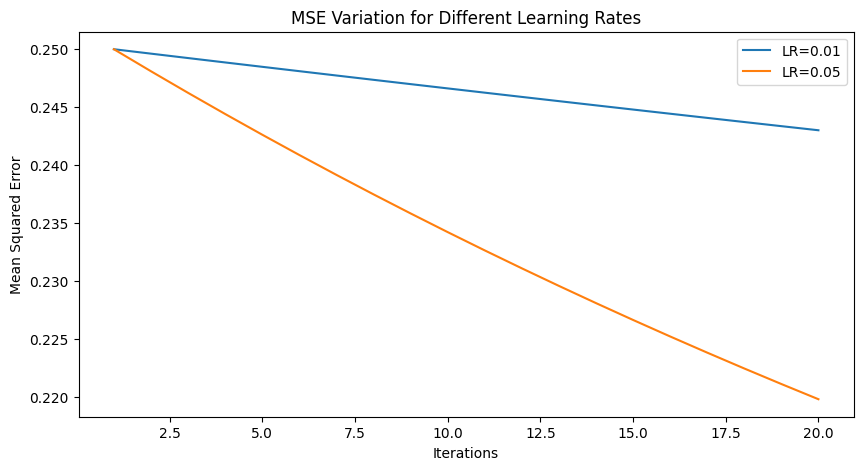

In [27]:
## Question 9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("A2_P2.csv")
x = data.iloc[:,1:3].values
y = data.iloc[:,3].values.reshape(-1,1)

# a) normalizinng feature
scaler = StandardScaler()
x = scaler.fit_transform(x)

x =  np.c_[np.ones(x.shape[0]), x]

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def calculate_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def gradient_descent(x, y, learning_rate, iterations):
    m, n = x.shape
    theta = np.zeros((n, 1))
    mse_values = []
    for i in range(iters):
        y_pred = sigmoid(np.dot(x, theta))
        gradient = (1/m) * np.dot(x.T, (y_pred - y))

        theta -= learning_rate * gradient

        mse = calculate_mse(y, y_pred)
        mse_values.append(mse)

    return theta, mse_values

learning_rates = [0.01, 0.05]
iters = 20

plt.figure(figsize=(10, 5))

for lr in learning_rates:
    theta_final, mse_values = gradient_descent(x, y, lr, iters)
    # a) MSE for 20 iterations
    plt.plot(range(1, iters+1), mse_values, label=f"LR={lr}")
    # b) print final weight values
    print(f"Final weights for learning rate {lr}: {theta_final.ravel()}")


plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE Variation for Different Learning Rates")
plt.legend()
plt.show()


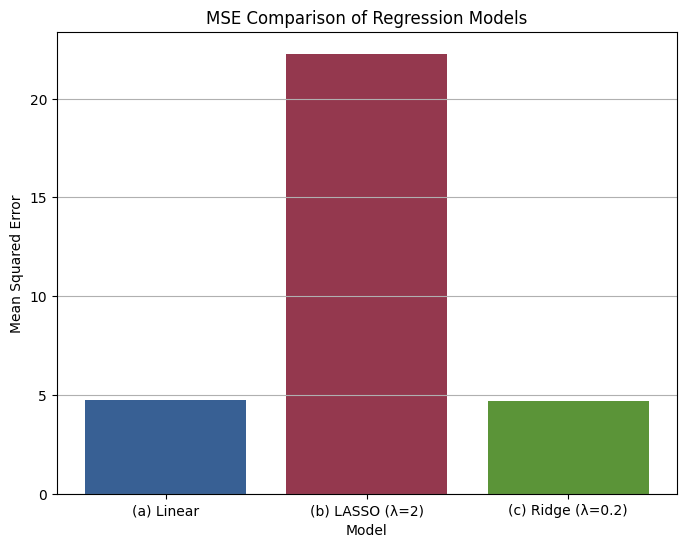

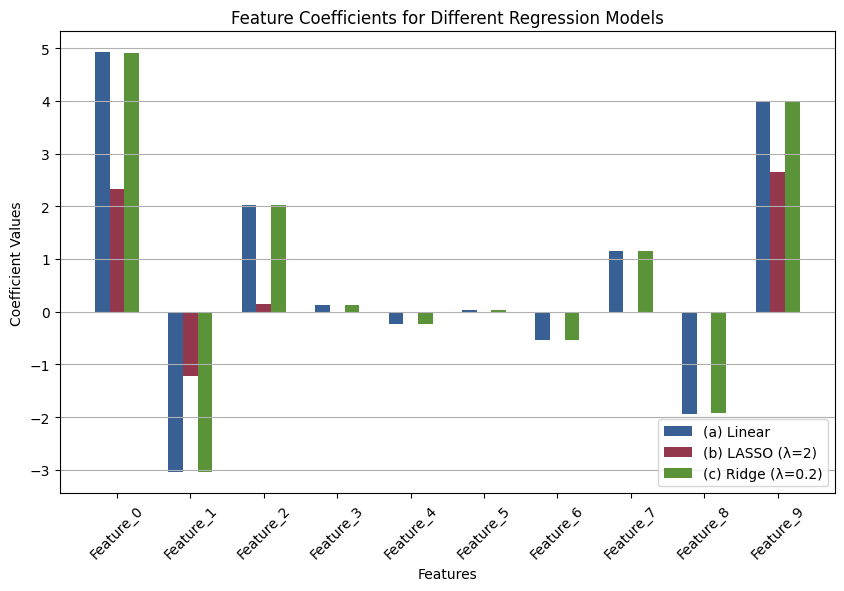

(a) Linear Regression MSE: 4.7221
(b) LASSO Regression MSE (λ=2): 22.2667
(c) Ridge Regression MSE (λ=0.2): 4.6842


In [26]:
## Question 10
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

data2 = pd.read_csv("A2_P3.csv")

X = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (a) Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# (b) Linear Regression with LASSO regularization (λ/2 = 1 → λ = 2)
lasso_model = Lasso(alpha=2)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# (c) Linear Regression with Ridge regularization (λ/2 = 0.1 → λ = 0.2)
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mse_values = [mse_linear, mse_lasso, mse_ridge]
models = ['(a) Linear', '(b) LASSO (λ=2)', '(c) Ridge (λ=0.2)']
weights = np.vstack([linear_model.coef_, lasso_model.coef_, ridge_model.coef_])

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['#386094', '#94384e', '#5b9438'])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison of Regression Models")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
x_labels = data2.columns[:-1]
width = 0.2

plt.bar(np.arange(len(x_labels)) - width, weights[0], width, label='(a) Linear', color='#386094')
plt.bar(np.arange(len(x_labels)), weights[1], width, label='(b) LASSO (λ=2)', color='#94384e')
plt.bar(np.arange(len(x_labels)) + width, weights[2], width, label='(c) Ridge (λ=0.2)', color='#5b9438')

plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Feature Coefficients for Different Regression Models")
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

print(f"(a) Linear Regression MSE: {mse_linear:.4f}")
print(f"(b) LASSO Regression MSE (λ=2): {mse_lasso:.4f}")
print(f"(c) Ridge Regression MSE (λ=0.2): {mse_ridge:.4f}")

